In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

print("Path to dataset files:", path)

Resuming download from 10485760 bytes (802262377 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/bhavikjikadara/dog-and-cat-classification-dataset?dataset_version_number=1 (10485760/812748137) bytes left.


100%|██████████| 775M/775M [03:03<00:00, 4.38MB/s] 

Extracting files...


Path to dataset files: C:\Users\grace\.cache\kagglehub\datasets\bhavikjikadara\dog-and-cat-classification-dataset\versions\1


In [ ]:
import shutil
try:
  shutil.move('path-to-dataset','data')
except Exception as e:
  print(e)

In [5]:
import tensorflow as tf

In [8]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [16]:
base_dir="data\\PetImages"
target=["train","validation","test"]

In [17]:
for dir in target:
  os.makedirs(os.path.join(dir,"Cat"),exist_ok=True)
  os.makedirs(os.path.join(dir,"Dog"),exist_ok=True)

In [18]:
for class_name in ["Cat","Dog"]:
  class_path=os.path.join(base_dir,class_name)
  imgs=os.listdir(class_path)
  train,temp=train_test_split(imgs,test_size=0.4,random_state=42)
  val,test=train_test_split(temp,test_size=0.5,random_state=42)
  for img in train:
    shutil.copy(os.path.join(class_path,img),os.path.join("train",class_name,img))
  for img in val:
    shutil.copy(os.path.join(class_path,img),os.path.join("validation",class_name,img))
  for img in test:
    shutil.copy(os.path.join(class_path,img),os.path.join("test",class_name,img))

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)

In [20]:
val_test_datagen=ImageDataGenerator(rescale=1./255)

In [21]:
train_generator=train_datagen.flow_from_directory(
    "train",
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)
val_generator=val_test_datagen.flow_from_directory(
    "validation",
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'

)
test_generator=val_test_datagen.flow_from_directory(
    "test",
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 14998 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [22]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(512,activation='relu'),
    Dense(1,activation='sigmoid')
])

c:\Users\grace\OneDrive\Desktop\vscode\dl\dl_v\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

c:\Users\grace\OneDrive\Desktop\vscode\dl\dl_v\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
573/750 ━━━━━━━━━━━━━━━━━━━━ 1:46 600ms/step - accuracy: 0.5272 - loss: 0.7454

c:\Users\grace\OneDrive\Desktop\vscode\dl\dl_v\Lib\site-packages\PIL\TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


750/750 ━━━━━━━━━━━━━━━━━━━━ 515s 684ms/step - accuracy: 0.5319 - loss: 0.7337 - val_accuracy: 0.5606 - val_loss: 0.7136
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 331s 441ms/step - accuracy: 0.5672 - loss: 0.6829 - val_accuracy: 0.6420 - val_loss: 0.6465
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 312s 416ms/step - accuracy: 0.6138 - loss: 0.6577 - val_accuracy: 0.6574 - val_loss: 0.6156
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 296s 395ms/step - accuracy: 0.6614 - loss: 0.6165 - val_accuracy: 0.6980 - val_loss: 0.5789
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 418s 558ms/step - accuracy: 0.6862 - loss: 0.5933 - val_accuracy: 0.7158 - val_loss: 0.5639
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 476s 603ms/step - accuracy: 0.7052 - loss: 0.5650 - val_accuracy: 0.7008 - val_loss: 0.5619
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 499s 665ms/step - accuracy: 0.7219 - loss: 0.5444 - val_accuracy: 0.7638 - val_loss: 0.4921
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 425s 566ms/step - accuracy: 0.7363 - loss: 0.52

In [25]:
test_loss,test_acc=model.evaluate(test_generator)
print(f"Test accuracy : {test_acc:.2f}")
model.save("dog_cat_classifier.h5")

c:\Users\grace\OneDrive\Desktop\vscode\dl\dl_v\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 98s 393ms/step - accuracy: 0.8020 - loss: 0.4308


Test accuracy : 0.80


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


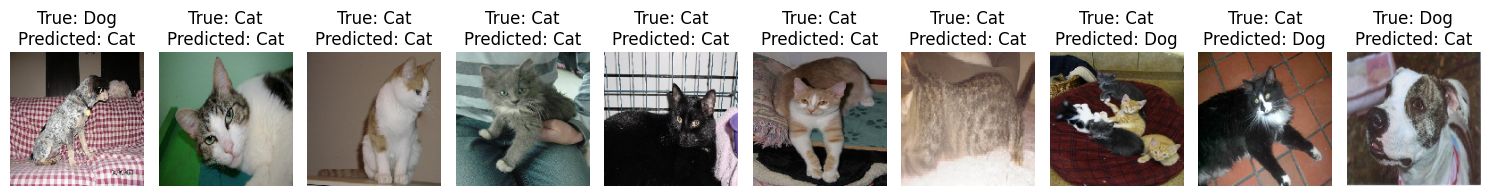

In [29]:
import matplotlib.pyplot as plt
test_batch = next(test_generator)
test_images = test_batch[0]
test_labels = test_batch[1]
predictions = model.predict(test_images)
predicted_labels = (predictions > 0.5).astype(int).flatten()
class_names = list(test_generator.class_indices.keys())
num_images_to_display = 10
plt.figure(figsize=(15, 5))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"True: {class_names[int(test_labels[i])]}\nPredicted: {class_names[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()